In [50]:
import numpy as np
import sympy as sp
import math
import cmath
import matplotlib.pyplot as plt

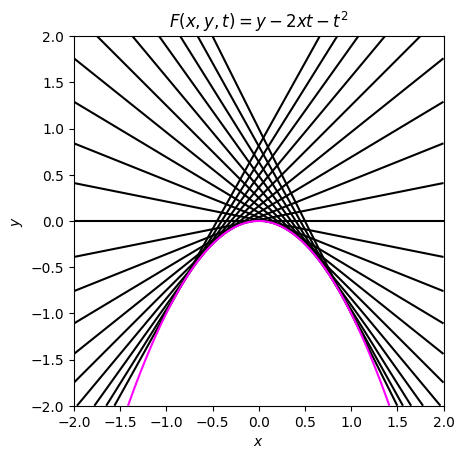

In [51]:
axlim = 2
x = np.linspace(-axlim, axlim, 100)
X, Y = np.meshgrid(x, x)

for t in np.arange(-1,1,0.1):
    Fxy =  Y - 2*X*t - t**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y + X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')
plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = y - 2xt - t^2$')
plt.show()

In [52]:
def equation_roots(a, b, c):
    D = b**2 - 4*a*c 
    if (D >= 0):
        sol1 = (-b-math.sqrt(D))/(2*a)
        sol2 = (-b+math.sqrt(D))/(2*a)


In [53]:
def find_closest_root(roots, t_min, t_max, previous_parameter):
    min_difference = float('inf')  # Initialize with a large value

    for root in roots:
        # Calculate the absolute difference
        difference = abs(root - previous_parameter)
        # Check if the root is within the interval and is different from the previous parameter
        if t_min <= root <= t_max and difference > 0: 
            # Check if this root is closer than the previous closest root
            if difference < min_difference:
                min_difference = difference
                closest_root = root

    return closest_root


In [54]:
def euler_method(function, x_start, y_start, t_min, t_max):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    h = 0.05
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')

    while parameter <= t_max:        
        # Calculate the gradient
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})
        print(f"Gradient at {x_start}, {y_start} and t={parameter}: ({gradient_x},{gradient_y})")

        x_new = x_start + h * (-gradient_y)
        y_new = y_start + h * gradient_x
        print(f"New point: ({x_new}, {y_new})")
        list_x.append(x_new)
        list_y.append(y_new)
        
        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, 'b.')

        a = -1
        b = -2*x_new
        c = y_new

        D = b**2 - (4*a*c)
        if (D >= 0):
            sol1 = (-b-cmath.sqrt(D))/(2*a)
            sol2 = (-b+cmath.sqrt(D))/(2*a)
            if (sol1==sol2):
                closest_root = sol1
            else: 
                if (parameter == sol1):
                    closest_root = sol2
                elif (parameter == sol2):
                    closest_root = sol1
                else:
                    closest_root = sol1
            print(f"Algorithm has chosen {closest_root} as a root")
            parameter = closest_root
        else:
            print("No real solution")
            parameter += 0.01

        

Starting point is (1,-1) and t=-1
Gradient at 1, -1 and t=-1: (2,1)
New point: (0.950000000000000, -0.900000000000000)
Algorithm has chosen -0.900000000000000 as a root
Gradient at 0.950000000000000, -0.900000000000000 and t=-0.900000000000000: (1.80000000000000,1)
New point: (0.900000000000000, -0.810000000000000)
No real solution
Gradient at 0.900000000000000, -0.810000000000000 and t=-0.890000000000000: (1.78000000000000,1)
New point: (0.850000000000000, -0.721000000000000)
Algorithm has chosen -0.811270166537926 as a root
Gradient at 0.850000000000000, -0.721000000000000 and t=-0.811270166537926: (1.62254033307585,1)
New point: (0.800000000000000, -0.639872983346207)
Algorithm has chosen -0.788729833462080 as a root
Gradient at 0.800000000000000, -0.639872983346207 and t=-0.788729833462080: (1.57745966692416,1)
New point: (0.750000000000000, -0.560999999999999)
Algorithm has chosen -0.711270166537921 as a root
Gradient at 0.750000000000000, -0.560999999999999 and t=-0.7112701665379

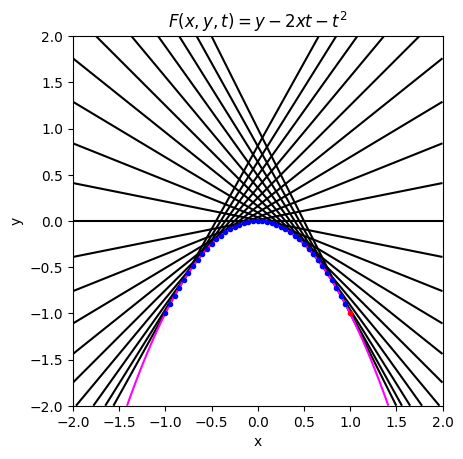

In [55]:
# Starting point
t_min = -1
t_max = 1

# a, b, c boli dopocitane z prieniku E a F_t_min, vznika kvadraticka rovnica pre x, z ktorej dopocitame y
a = -1
b = 2
c = -1
x_start = 1
# mame nastastie iba jeden koren, netreba vyberat
y_start = -1
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

x = np.linspace(-axlim, axlim ,100)
plt.xlim(x[0],x[-1])
plt.ylim([-2,2])
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.title(r'$F(x, y, t) = y - 2xt - t^2$')

X, Y = np.meshgrid(x, x)
for t in np.arange(-1,1,0.1):
    Fxy =  Y - 2*X*t - t**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y + X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

x, y, t = sp.symbols('x y t')
family_of_curves = y - 2*x*t - t**2
euler_method(family_of_curves, x_start, y_start, t_min, t_max)

#print(pointsx)
#print(pointsy)
plt.show()